In [4]:
import os
import sys
#sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils
from autoencoder import adversarial as aae

In [9]:
def setup():
    esize = [(128,3), (256, 3), (512,3)]
    dsize = list(reversed(esize))

    params =dict()
    
    params['width'] = 32
    params['height'] = 32
    params['nchannels'] = 3
    params['channels'] = [0,2,4]
    params['nepochs'] = 20
    params['batchsize'] = 256
    params['learning_rate'] = 0.0003
    params['restore'] = False
    params['latent_size'] = 256
    params['enc_sizes'] = esize 
    params['dec_sizes'] = dsize
    params['droprate'] = 0.85
    params['stdev'] = 0.04
    params['denoise'] = False
    params['slam'] = 0

    return params

Using data from: /media/cjw/Data/cyto/Snail_rop/
Saving checkpoints to: /media/cjw/Data/cyto/Checkpoints/2018-11-28-21-54-36_snail_rop/checkpoint-2018-11-28-21-54-36/autoencoder-256x
Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 3), dtype=float32) (?, 32, 32, 3)
Tensor("encoder/latent_space/BiasAdd:0", shape=(?, 256), dtype=float32)
isize:  4 32
Tensor("decoder/Sigmoid:0", shape=(?, 32, 32, 3), dtype=float32)
<tf.Variable 'encoder/filter_00/kernel:0' shape=(3, 3, 3, 128) dtype=float32_ref>
<tf.Variable 'encoder/filter_00/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'encoder/filter_01/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>
<tf.Variable 'encoder/filter_01/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'encoder/filter_02/kernel:0' shape=(3, 3, 256, 512) dtype=float32_ref>
<tf.Variable 'encoder/filter_02/bias:0' shape=(512,) dtype=float32_ref>
<tf.Variable 'encoder/latent_space/kernel:0' shape=(8192, 256) dtype=float32_ref>
<tf.Variable 'encoder/latent_s

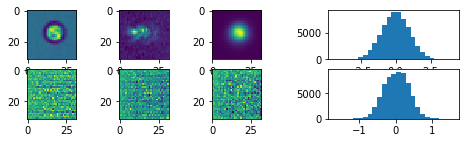

100 1.2187865 0.77166414 28.123304
200 3.0528772 0.65008837 26.264149
300 2.3744218 0.6190218 25.976002
400 2.3189993 0.83255327 23.587212
500 1.2001239 0.78641343 21.240963
600 1.4451346 0.6407945 20.046577
700 1.4498297 0.6782035 19.657728
800 1.297573 0.731601 19.125237
900 1.3148556 0.6885721 18.3527
1000 1.2291113 0.7008295 16.488026
display


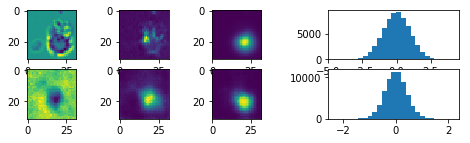

1100 1.3204913 0.69365525 16.612432
1200 1.290718 0.7469796 16.427372
1300 2.0681448 0.5309683 15.565238
1400 2.3094482 0.51360375 17.000145
1500 1.3814454 0.7827842 15.277202
1600 2.0945964 0.70485497 14.463279
1700 1.3771405 0.8909924 13.131234
1800 1.8111296 0.7703728 13.359111
1900 1.4411063 0.6407425 12.319099
2000 1.4034544 0.64693856 11.845835
display


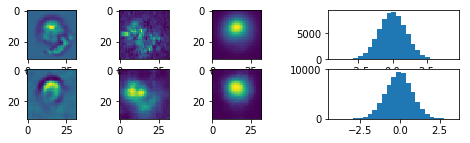

2100 1.3510118 0.6527998 11.126123
2200 1.2959611 0.72184384 10.701319
2300 1.4243124 0.6975701 10.608601
2400 1.806303 0.70732456 10.307832
2500 1.4970498 0.6600807 10.884859
2600 1.6768422 0.64777094 10.1869335
2700 1.4351685 0.653243 9.815785
2800 1.571491 0.6818437 9.589339
2900 1.5678957 0.7050735 9.388039
3000 1.7218986 0.70436496 9.636017
display


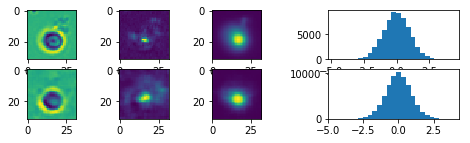

3100 1.3519498 0.69638366 9.059969
3200 1.8370857 0.60999 9.191449
3300 1.6379406 0.5831726 8.745777
3400 1.4687132 0.6583795 8.316317
3500 1.5806684 0.62724173 8.35387
3600 1.6295729 0.6664261 7.9398775
3700 1.5996392 0.662588 8.526223
3800 1.433541 0.6551507 7.7424045
3900 1.6203822 0.5836468 8.248896
4000 1.530056 0.57949024 7.7358747
display


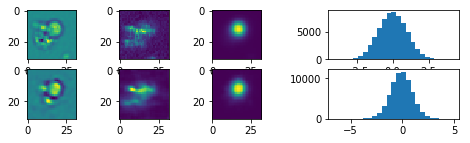

4100 1.7313538 0.8118136 8.090677
4200 1.9298708 0.55337334 8.281624
4300 1.5866272 0.77498025 7.8166866
4400 1.4130468 0.63704306 7.3490615
4500 1.4003365 0.6519755 7.3661733
4600 1.7668102 0.7464812 7.7853546
4700 1.4568349 0.6727445 7.434175
4800 1.5552568 0.5865563 7.2167363
4900 1.5030437 0.63560414 7.388977
5000 1.8818686 0.51865923 9.999196
display


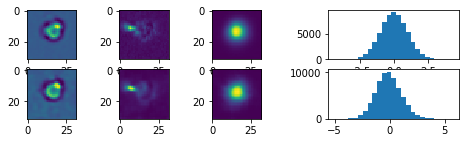

5100 2.0800083 0.5730934 8.855157
5200 1.6291747 0.59862036 7.5631104
5300 1.653609 0.68927556 7.248665
5400 1.4629545 0.5848799 6.8341084
5500 1.4578933 0.6948973 6.546478
5600 1.4951047 0.62082 6.9626613
5700 1.4844826 0.5833787 6.866022
5800 1.6067238 0.6207949 6.658257
5900 1.6544893 0.5913581 7.132953
6000 1.36302 0.64065707 6.762007
display


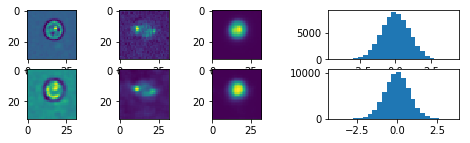

6100 1.7367129 0.57287216 6.67104
6200 1.8929423 0.58371687 6.540189
6300 1.5394905 0.636415 6.781118
6400 1.3796157 0.691625 6.127412
6500 1.8536313 0.61392313 6.6555033
6600 1.5130095 0.61102307 6.43132
6700 1.6244931 0.6483011 6.543838
6800 1.5903251 0.68364936 6.5577383
6900 1.6199563 0.6269454 6.3590546
7000 1.5735059 0.6347719 6.531596
display


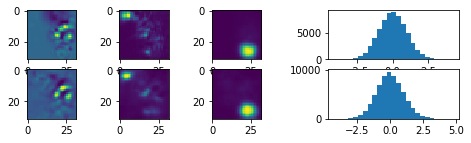

7100 1.7164184 0.6662499 6.32236
7200 1.5176492 0.5802458 6.2299004
7300 1.4380605 0.62880963 6.0243297
7400 1.5219113 0.6428647 6.033498
7500 1.6940191 0.6452868 5.8650064
7600 1.5116537 0.56687945 5.7512527
7700 1.5439117 0.58428544 5.691869
7800 1.5306716 0.5981303 5.863959
7900 1.5054332 0.5852126 5.5358734
8000 1.5862601 0.55456334 6.1922717
display


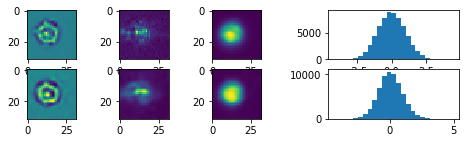

8100 1.6045928 0.6360746 5.917124
8200 1.4988489 0.6587293 6.33578
8300 1.5164952 0.5823534 5.9787445
8400 1.4450755 0.61987144 6.010502
8500 1.509341 0.5863569 6.1559124
8600 1.5336107 0.6315912 6.152048
8700 1.7285585 0.619617 6.4528894
8800 1.6287715 0.5904329 6.210067
8900 1.4350576 0.68631524 6.081618
9000 1.471254 0.6541731 5.888427
display


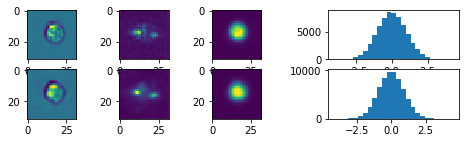

9100 1.4690745 0.6742532 5.610071
9200 1.4455867 0.62300205 5.607376
9300 1.422947 0.6506551 5.807497
9400 1.6141448 0.6648774 5.8575544
9500 1.7836695 0.6077536 5.954257
9600 1.6191885 0.64542603 5.614847
9700 1.5093465 0.61073875 5.8732123
9800 1.6763482 0.5290219 6.1209955
9900 1.6176398 0.6317265 5.9105697
10000 1.561192 0.6151879 5.9932775
display


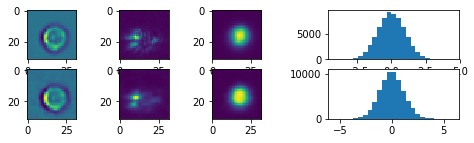

10100 1.5555656 0.6309465 5.980684
10200 1.4472907 0.6199671 5.750986
10300 1.5445279 0.6417421 5.3545113
10400 1.6309173 0.6380561 5.3477173
10500 1.547699 0.6451603 5.534148
10600 1.5648944 0.60781336 5.9746466
10700 1.4861493 0.6043107 5.3714485
10800 1.4517529 0.60836345 5.167478
10900 1.5480676 0.66210395 5.695081
11000 1.5131011 0.658708 5.31988
display


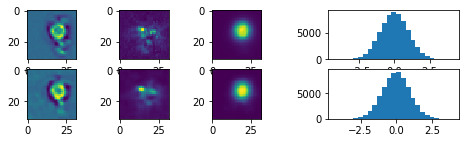

11100 1.4789739 0.62881094 5.052267
11200 1.4320571 0.61018527 5.437599
11300 1.4971714 0.66204095 5.922431
11400 1.6584393 0.63400656 5.460599
11500 1.5701544 0.6655334 5.8551435
11600 1.6196296 0.6183879 5.5360513
11700 1.4701864 0.66709924 5.26544
11800 1.5739429 0.54629153 5.260207
11900 1.4712901 0.64079595 5.722803
12000 1.483527 0.61377394 5.2528915
display


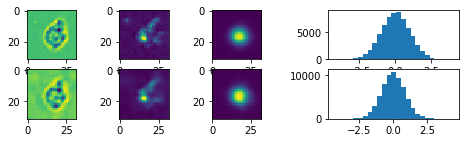

12100 1.4231765 0.6725534 5.0915184
12200 1.5179086 0.6580639 5.425057
12300 1.5529132 0.6950011 5.2989683
12400 1.5394714 0.6650527 5.4209
12500 1.6292167 0.6133388 6.1394777
12600 1.4431378 0.6779994 5.2955313
12700 1.6058564 0.6178093 4.9828706
12800 1.8745186 0.5668442 5.90496
12900 1.7001555 0.6311209 5.9262285
13000 1.4746838 0.635142 5.1230593
display


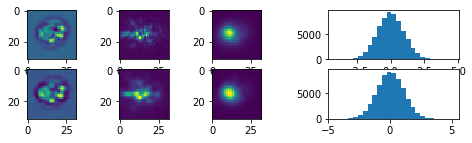

13100 1.638346 0.6230151 6.664504
13200 1.5665421 0.6015503 5.343699
13300 1.4597634 0.65499574 5.227104
13400 1.4592171 0.63591474 4.9920235
13500 1.4664391 0.5920965 5.2050223
13600 1.5464616 0.5854956 5.0802984
13700 1.4960713 0.60498327 5.4719477
13800 1.5162141 0.641306 5.427662
13900 1.4984852 0.61847174 5.228856
14000 1.4493083 0.6464636 4.8738937
display


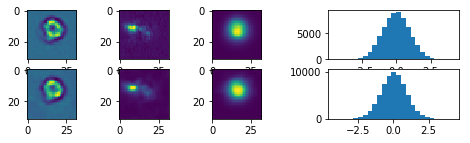

14100 1.4116467 0.64725316 5.1415734
14200 1.4101101 0.6589758 4.8733044
14300 1.485973 0.67949367 5.0727344
14400 1.4488505 0.68188274 4.66451
14500 1.473218 0.6300469 4.875075
14600 1.6716783 0.6464655 7.3441906
14700 1.5896472 0.6513513 5.3272433
14800 1.5002823 0.67457765 5.0971656
14900 1.4375594 0.66911674 4.701888
15000 1.4547435 0.6296506 4.8587255
display


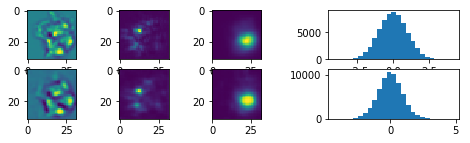

15100 1.4444549 0.62908226 5.0873585
15200 1.4785094 0.6480862 5.340235
15300 1.4476902 0.6834943 5.160095
15400 1.4862945 0.61347216 5.22197
15500 1.4546342 0.65026736 4.998898
15600 1.4572678 0.64551663 4.651204
15700 1.4458277 0.69735986 5.152827
15800 1.4147975 0.66032773 4.8453274
15900 1.4804423 0.5828135 5.0184665
16000 1.5538938 0.56309223 4.8779097
display


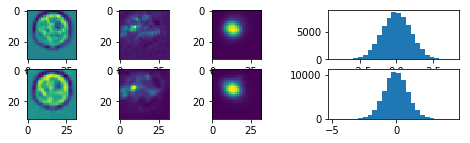

16100 1.5436418 0.6389099 4.7989507
16200 1.4454967 0.63806355 4.8955746
16300 1.4344063 0.6599956 4.724454
16400 1.4642026 0.6570015 4.8870873
16500 1.522422 0.6932535 4.65662
16600 1.3800212 0.7383448 5.5483932
16700 1.4734337 0.61204195 5.0658045
16800 1.4580071 0.62796986 4.9131927
16900 1.4891942 0.6954396 4.7781525
17000 1.5148299 0.64252734 4.899315
display


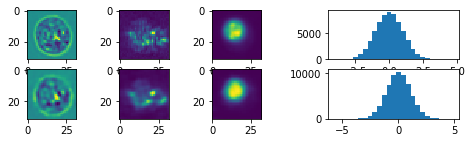

17100 1.4489915 0.70602286 4.6687737
17200 1.4669614 0.61387134 4.899703
17300 1.4293671 0.6374247 5.0164843
17400 1.396496 0.65556717 4.560702
17500 1.3903439 0.70793355 4.6691065
17600 1.4867532 0.6381137 4.946968
17700 1.5196016 0.6871446 5.156104
17800 1.5146637 0.6739495 4.8037114
17900 1.4338024 0.63334054 4.7908216
18000 1.4429331 0.6823472 4.936165
display


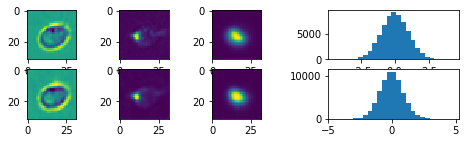

18100 1.4449625 0.6856939 4.75125
18200 1.4093584 0.6771731 4.6372137
18300 1.4889312 0.7013098 5.082543
18400 1.4585024 0.5986718 5.3189025
18500 1.5205534 0.67593503 5.1501102
18600 1.4391191 0.646476 4.61875
18700 1.4883071 0.7222909 4.634487
18800 1.4716289 0.6904394 5.105435
18900 1.4718235 0.6676015 5.0033545
19000 1.4497161 0.68138236 5.1202517
display


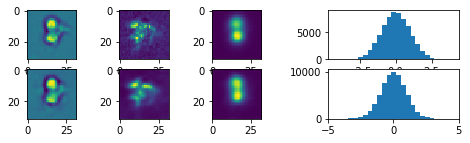

19100 1.4699306 0.682827 5.0880947
19200 1.4636122 0.6072225 4.8736033
19300 1.5700771 0.6560524 4.825584
19400 1.4517826 0.6304604 4.784767
19500 1.4592066 0.6663701 5.0007515
19600 1.509659 0.6789794 6.687201
19700 1.4860511 0.62169105 4.8932786
19800 1.4790891 0.70697373 5.5809436
19900 1.6594449 0.6106049 5.331101
20000 1.416759 0.6781652 4.7844763
display


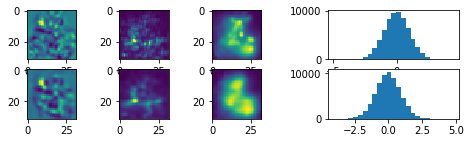

20100 1.497802 0.64177513 4.799568
20200 1.4879017 0.6831924 5.045893
20300 1.4361697 0.6679205 4.9240103
20400 1.4734931 0.68327856 4.646885
20500 1.4883335 0.6835633 4.95109
20600 1.4046047 0.64629406 4.520488
20700 1.4150697 0.666886 4.9006615
20800 1.4186966 0.6860999 4.7533007
20900 1.4028981 0.6530844 4.4170794
21000 1.4349227 0.6633177 4.7774024
display


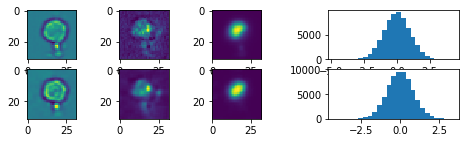

21100 1.456147 0.719283 4.8245077
21200 1.4456457 0.6604764 4.5553756
21300 1.4465625 0.61310065 4.700717
21400 1.5089144 0.6655774 4.7112656
21500 1.4563835 0.6276354 4.9036827
21600 1.4991438 0.6783301 4.692199
21700 1.3905535 0.6877914 4.4946837
21800 1.4529676 0.6658133 5.139865
21900 1.4748672 0.6072868 4.9921665
22000 1.4673755 0.66575265 4.8235493
display


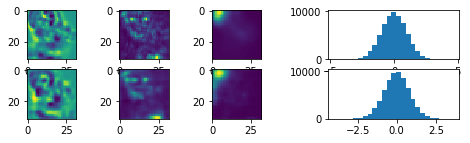

22100 1.4887573 0.70885986 5.2324257
22200 1.5400562 0.6497492 5.0305724
22300 1.4190106 0.6596656 4.974804
22400 1.4492657 0.6841898 4.7947073
22500 1.4212427 0.61811423 4.7697663
22600 1.5232412 0.64176905 5.898006
22700 1.4621432 0.69671357 4.8168874
22800 1.4142783 0.6708563 4.7697678
22900 1.4236817 0.66133046 4.7999573
23000 1.5095003 0.66395986 5.35714
display


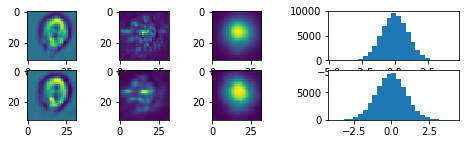

23100 1.3768245 0.6949654 5.224778
23200 1.482369 0.67875874 5.02233
23300 1.4360882 0.6233266 5.095342
23400 1.5133855 0.5702626 5.258406
23500 1.444693 0.6881381 5.2971163
23600 1.4553132 0.6187135 5.0422673
23700 1.4201207 0.64281756 4.6569543
23800 1.4623737 0.6566453 4.928614
23900 1.526335 0.64634806 4.935955
24000 1.4288824 0.69966584 4.7401257
display


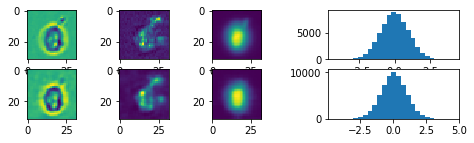

24100 1.4049246 0.734968 5.1242557
24200 1.4333563 0.63493514 4.8893766
24300 1.4539433 0.64164424 4.9125853
24400 1.4490271 0.6661404 5.1077366
24500 1.4335194 0.66665876 4.7995667
24600 1.4489801 0.67078817 4.9602046
24700 1.447869 0.61441475 5.006328
24800 1.522402 0.64576656 4.9735856
24900 1.3441865 0.72716653 4.7815657
25000 1.4289358 0.6315757 4.578214
display


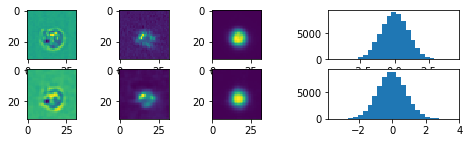

25100 1.434704 0.6480572 4.9597936
25200 1.4673071 0.68083704 4.7603517
25300 1.4585047 0.6684102 4.6423993
25400 1.3869021 0.698408 5.2296686
25500 1.4738476 0.65129596 4.9347095
25600 1.4200449 0.67167234 4.6903567
25700 1.438461 0.6442041 4.961755
25800 1.4902861 0.65704983 4.884753
25900 1.4524187 0.6027809 5.0474606
26000 1.4612703 0.63831747 5.09007
display


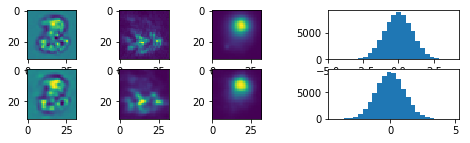

26100 1.4492432 0.6409558 4.880086
26200 1.4110332 0.65924144 4.6343365
26300 1.396137 0.681003 4.71272
26400 1.4982035 0.65515876 5.871793
26500 1.4580605 0.6010903 5.115575
26600 1.4226673 0.6025245 4.997047
26700 1.4050343 0.6445574 5.413651
26800 1.4326437 0.64653414 4.855813
26900 1.4486408 0.6158389 4.8562927
27000 1.4057119 0.6742348 4.9073143
display


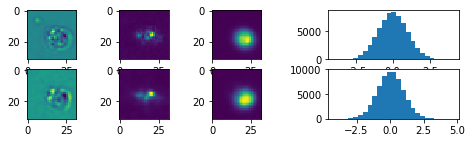

27100 1.408569 0.65865916 5.0403914
27200 1.4243616 0.6608699 4.915968
27300 1.4831932 0.6963704 4.732825
27400 1.4520156 0.6989515 4.7316236
27500 1.4266181 0.62247646 4.404728
27600 1.508173 0.71061593 4.7441664
27700 1.4752005 0.70337045 5.270584
27800 1.4446785 0.69090396 4.440734
27900 1.3760586 0.68792987 4.9364505
28000 1.4375572 0.70683014 4.796284
display


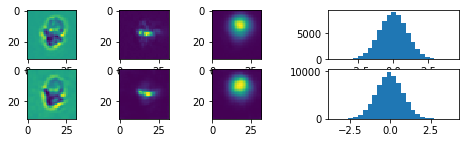

28100 1.4358262 0.68018574 4.6316643
28200 1.4316525 0.62351537 4.794704
28300 1.4516683 0.67517 4.789904
28400 1.5070572 0.69235176 4.961503
28500 1.444879 0.6811423 4.918966
28600 1.441971 0.64838135 4.9140534
28700 1.4163975 0.6423743 4.7776694
28800 1.4198799 0.6345633 4.442931
28900 1.4683837 0.6838099 4.9039865
29000 1.4726925 0.615474 4.5361366
display


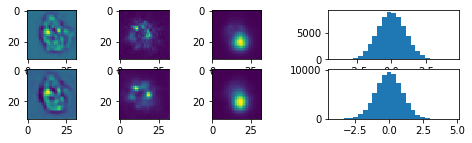

29100 1.4595218 0.69292593 4.778188
29200 1.4089262 0.6243609 5.0244293
29300 1.4077139 0.67583996 4.9924097
29400 1.4752269 0.5892066 5.0362916
29500 1.4213369 0.6478136 5.0886135
29600 1.4156523 0.6612854 4.804044
29700 1.4032912 0.6933836 4.508632
29800 1.4555969 0.6880245 4.590418
29900 1.4384975 0.65990704 4.8285117
30000 1.3981727 0.6467519 4.5872316
display


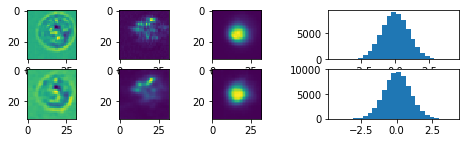

30100 1.3907492 0.6865521 4.7261004
30200 1.3862643 0.6929158 4.786561
30300 1.4131391 0.6985472 4.5562506
30400 1.4359686 0.68869954 5.4739895
30500 1.4659519 0.7064931 4.912326
30600 1.4032608 0.6841985 4.493994
30700 1.4296523 0.60672915 5.027249
30800 1.6328263 0.6219848 5.38576
30900 1.5163596 0.6667259 5.8076773
31000 1.4490899 0.6955739 5.1851177
display


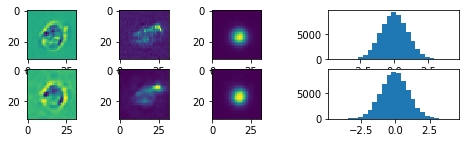

31100 1.4377334 0.638775 4.920302
31200 1.4468815 0.70831394 5.0932684
31300 1.4092877 0.6659045 5.026574
31400 1.4214356 0.6578706 4.655218
31500 1.4017811 0.7062314 4.7569017
31600 1.4324135 0.6609529 4.7367706
31700 1.4100549 0.6796437 4.6851816
31800 1.3928175 0.64567244 4.930253
31900 1.4536358 0.7271444 4.4710207
32000 1.4161223 0.631853 4.6437545
display


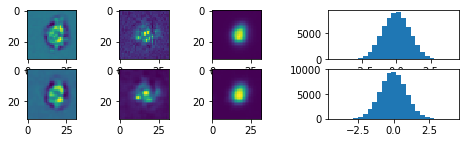

32100 1.4077592 0.7043838 4.6816573
32200 1.411381 0.69169676 4.5452065
32300 1.4113102 0.67548096 4.501837
32400 1.4452878 0.6675943 4.621353
32500 1.4417157 0.69009244 4.611889
32600 1.4479349 0.64168334 4.687047
32700 1.4403863 0.66454625 4.5458155
32800 1.4314542 0.6400616 4.672753
32900 1.4868557 0.7241813 5.6877213
33000 1.4287997 0.6117343 5.0297737
display


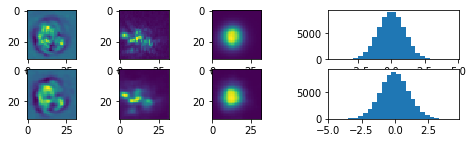

33100 1.4941531 0.71665573 5.1494985
33200 1.4887725 0.6976127 5.0022583
33300 1.5065722 0.699497 4.7288494
33400 1.4378597 0.6421056 5.314804
33500 1.4475534 0.64331937 5.426684
33600 1.445363 0.6136969 4.7398667
33700 1.4613829 0.62148607 5.175371
33800 1.4218627 0.67357486 4.9981213
33900 1.4361205 0.6365553 4.948381
34000 1.4071485 0.6946552 4.628136
display


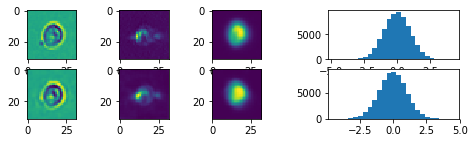

34100 1.4285864 0.6789813 4.596382
34200 1.4275964 0.70747995 4.7679396
34300 1.5547283 0.6795811 4.8305
34400 1.4091318 0.66663337 4.841452
34500 1.4557922 0.7254562 4.8048735
34600 1.4499351 0.6899594 5.134065
34700 1.4025822 0.6558425 4.8736343
34800 1.4545188 0.6066957 4.6628084
34900 1.4978971 0.7139839 4.8682814
35000 1.467794 0.7271364 4.9763484
display


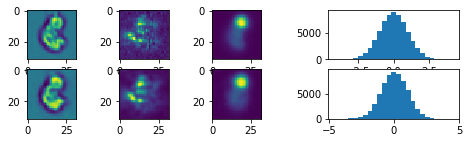

35100 1.528654 0.64872307 4.603242
35200 1.4617888 0.7037216 5.206329
35300 1.5057077 0.7077747 5.392112
35400 1.4442492 0.70380795 5.1276555
35500 1.4205412 0.6232749 4.6584616
35600 1.5374417 0.65837187 4.848571
35700 1.4530416 0.6344148 4.636214
35800 1.419827 0.6591256 4.9487214
35900 1.4795444 0.673399 5.0897937
36000 1.5307617 0.6403737 5.129575
display


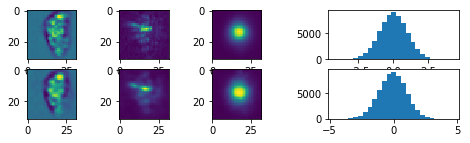

36100 1.4277931 0.6672044 4.8043566
36200 1.4460695 0.6056143 4.827882
36300 1.4088535 0.68490696 5.07464
36400 1.4973178 0.7019963 4.8018246
36500 1.4450672 0.6681466 4.774472
36600 1.4283311 0.6895114 4.4906783
36700 1.4461579 0.66998464 4.892554
36800 1.411861 0.6692653 4.6835227
36900 1.4183099 0.69749945 4.7637434
37000 1.4105169 0.68992126 4.868592
display


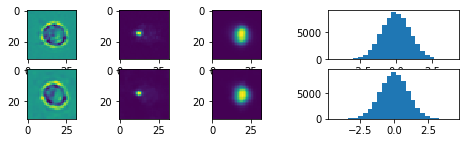

37100 1.4958919 0.76999223 5.029658
37200 1.4919008 0.6715135 4.8275886
37300 1.5103455 0.6695163 5.1860356
37400 1.4486833 0.71357363 5.060174
37500 1.4997349 0.65494907 5.1335764
37600 1.4330859 0.63685834 5.0864606
37700 1.3904831 0.6737065 4.476346
37800 1.4224555 0.6417705 4.8875237
37900 1.4711142 0.67991716 4.8994293
38000 1.441843 0.6635385 4.8299885
display


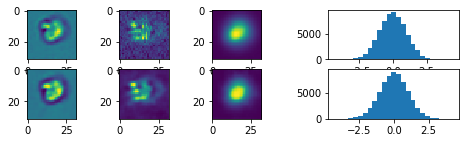

38100 1.415502 0.67204547 4.9265327
38200 1.4627266 0.7029695 4.856474
38300 1.3807971 0.68956417 4.66429
38400 1.4351916 0.68253297 5.0356913
38500 1.4189949 0.64136237 4.9079704
38600 1.4472396 0.72915745 4.693998
38700 1.4418921 0.66340226 4.8677735
38800 1.4677023 0.6456382 4.6470523
38900 1.4502747 0.6911042 5.1733675
39000 1.4166179 0.6427307 4.854551
display


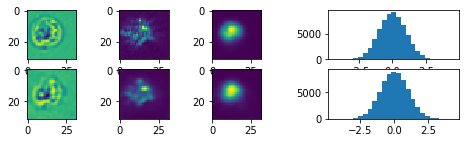

39100 1.4887722 0.6596004 5.032548
39200 1.4285955 0.695755 4.951712
39300 1.4724573 0.67691666 4.8565044
39400 1.4512856 0.6223203 4.6408954
39500 1.4592661 0.6509789 4.4726353
39600 1.5223479 0.64791924 5.2084837
39700 1.4462869 0.69748574 5.1466923
39800 1.4132282 0.65802366 5.104936
39900 1.4379352 0.6450504 5.684247
40000 1.4088886 0.6142625 5.1246405
display


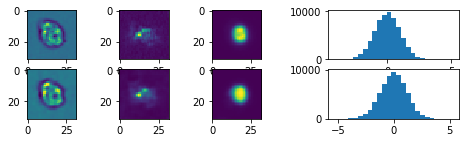

40100 1.4512647 0.8102916 6.148591
40200 1.4910791 0.59265697 5.2971935
40300 1.4829586 0.5696048 4.928531
40400 1.4875441 0.69200236 4.8134427
40500 1.4479887 0.6170802 4.698769
40600 1.4372654 0.68038607 4.6620884
40700 1.4128217 0.63438106 4.676136
40800 1.4091771 0.6404056 4.6192822
40900 1.3547086 0.70863825 4.5394917
41000 1.3999403 0.6708443 4.87449
display


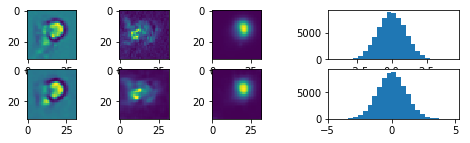

41100 1.437356 0.7161782 4.6030316
41200 1.4335425 0.66124964 4.6975474
41300 1.3939316 0.6611575 4.5647235
41400 1.4608083 0.69775057 4.374446
41500 1.4056972 0.6791813 4.856071
41600 1.4520011 0.6771865 4.527384
41700 1.4234297 0.69648576 4.6306024
41800 1.4765925 0.72732174 4.7367725
41900 1.3910856 0.6485716 4.7323217
42000 1.4183228 0.6701127 4.6355786
display


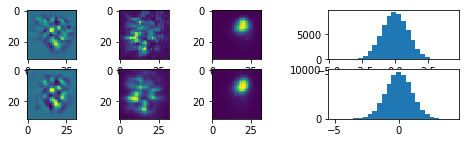

42100 1.4671652 0.70063174 5.1034403
42200 1.5138444 0.63927084 5.2173624
42300 1.4332783 0.6305168 4.6749234
42400 1.440628 0.6826825 5.1000743
42500 1.4504775 0.6828089 4.628554
42600 1.5503714 0.6596877 5.015585
42700 1.4417448 0.6239363 4.9825854
42800 1.4344288 0.61963326 4.7189083
42900 1.4161992 0.6369614 4.8286037
43000 1.4830321 0.67801946 5.259801
display


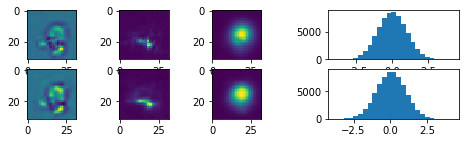

43100 1.436732 0.69457006 5.1505327
43200 1.4438533 0.6811245 5.330143
43300 1.4492425 0.6736178 8.011195
43400 1.5232515 0.66943127 5.236688
43500 1.5128787 0.72114587 5.301314
43600 1.4937669 0.61458457 5.1554127
43700 1.4835204 0.655748 4.824756
43800 1.4867651 0.68368363 5.2453694
43900 1.4039664 0.6716623 4.9231915
44000 1.4315547 0.6827992 4.4517
display


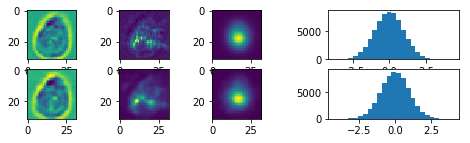

44100 1.4474034 0.6665052 4.9301243
44200 1.4188535 0.6618769 4.3947544
44300 1.4477282 0.66872996 5.039573
44400 1.4471576 0.6653932 4.9328527
44500 1.4274583 0.6306819 4.699493
44600 1.4146067 0.6393999 4.5940285
44700 1.3988338 0.7034767 4.607383
44800 1.421999 0.6903796 4.667563
44900 1.3843977 0.69656086 4.865453
45000 1.41145 0.7191865 4.906143
display


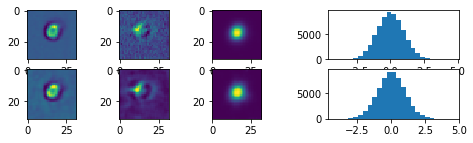

45100 1.4529105 0.6992768 4.917671
45200 1.4714661 0.6408418 4.933288
45300 1.4686663 0.67781293 5.1479306
45400 1.4391668 0.6875406 4.6002784
45500 1.4064707 0.6938775 4.613589
45600 1.4827209 0.6935538 5.107713
45700 1.4422789 0.61863106 4.9983773
45800 1.4649212 0.7307242 4.8520594
45900 1.5680932 0.68292093 5.5937552
46000 1.4805211 0.66815656 4.706802
display


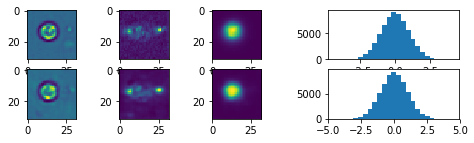

46100 1.5255822 0.6188131 6.5804105
46200 1.5121763 0.6714802 5.216728
46300 1.4152383 0.6306551 5.379494
46400 1.4540217 0.63660944 4.788988
46500 1.4032557 0.641443 5.2290006
46600 1.402179 0.70821404 5.0961432
46700 1.4094188 0.6422675 4.8933077
46800 1.4538605 0.66459703 5.2151337
46900 1.5070417 0.63774776 5.204646
47000 1.483184 0.67789596 5.2025485
display


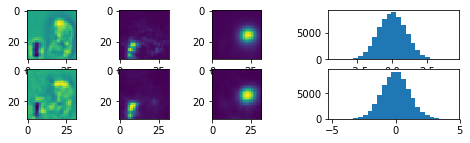

47100 1.482754 0.7009259 5.183424
47200 1.4634507 0.6150206 5.0801544
47300 1.4510536 0.6841489 4.9227457
47400 1.5159935 0.63650364 5.164092
47500 1.5004687 0.66367066 5.3905754
47600 1.4854193 0.73409593 5.3410625
47700 1.481025 0.69589067 5.1426024
47800 1.4204557 0.6944101 4.958905
47900 1.3944303 0.66422725 5.38721
48000 1.4484836 0.6731999 4.925352
display


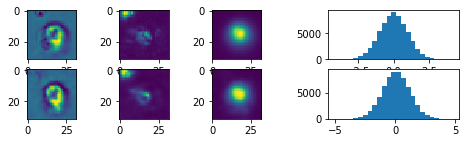

48100 1.4458027 0.6901122 4.9844236
48200 1.4650788 0.64329 4.8791356
48300 1.4376677 0.6805238 4.8341475
48400 1.4555843 0.6717104 4.9581475
48500 1.4341204 0.6756727 5.2208185
48600 1.4581451 0.67056817 5.218619
48700 1.5629787 0.71740603 5.7094865
48800 1.5622958 0.800776 5.444955
48900 1.5035124 0.61590177 4.878376
49000 1.4393706 0.6880978 4.777449
display


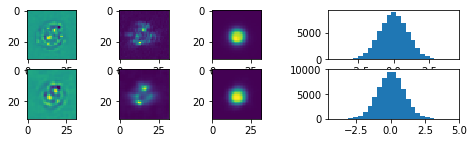

49100 1.4266884 0.6557498 4.7724714
49200 1.4208119 0.6928324 4.61118
49300 1.4397281 0.6695703 4.686531
49400 1.4132676 0.6895624 4.4938927
49500 1.4154884 0.6891606 4.39805
49600 1.3901584 0.7177094 4.513144
49700 1.4288263 0.6769938 4.38148
49800 1.42837 0.7065015 4.3724976
49900 1.3923104 0.71255654 4.364498
50000 1.4037747 0.6604018 4.1866293
display


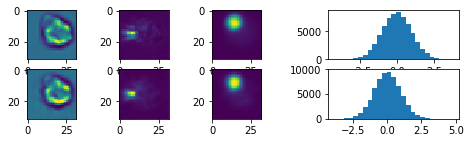

50100 1.3951845 0.73139787 4.103608
50200 1.4323561 0.7227197 4.5572042
50300 1.413693 0.62451935 4.304261
50400 1.3799353 0.704949 4.1796203
50500 1.4355043 0.7467424 4.365492
50600 1.4664097 0.71675277 4.5726666
50700 1.440131 0.66459787 4.3949347
50800 1.431936 0.67679155 4.5283313
50900 1.490234 0.6965619 4.6370263
51000 1.4690905 0.6897929 4.720875
display


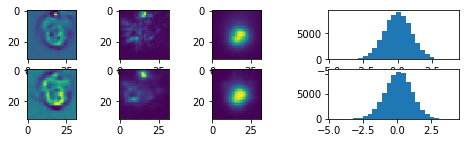

51100 1.4323605 0.63069016 5.069693
51200 1.4427983 0.66337883 4.7543864
51300 1.422658 0.7001885 5.644168
51400 1.4517498 0.73260295 5.0811224
51500 1.4956523 0.6789974 5.011217
51600 1.4236853 0.6204261 4.524259
51700 1.5058277 0.7118657 4.9182696
51800 1.4102602 0.70229024 4.592902
51900 1.5214152 0.7170157 4.837855
52000 1.4541154 0.657232 4.7845006
display


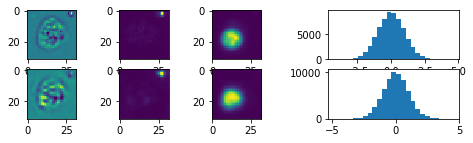

52100 1.4427578 0.65194905 4.5279164
52200 1.4140265 0.68593127 4.702173
52300 1.40872 0.6691864 4.5217586
52400 1.4693999 0.69855374 4.890369
52500 1.4161627 0.6342226 4.7041674
52600 1.4492375 0.67208636 4.391667
52700 1.3993354 0.7313272 4.7549243
52800 1.4207398 0.76216334 4.628355
52900 1.5284172 0.71356606 5.035836
53000 1.4270315 0.6504297 5.384379
display


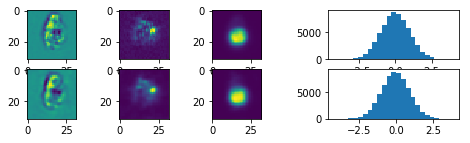

53100 1.3967981 0.65228105 5.135517
53200 1.4584734 0.6776707 4.8373027
53300 1.4480882 0.6873465 4.9387827
53400 1.447197 0.69634366 5.399552
53500 1.4647825 0.65219873 5.121397
53600 1.4344258 0.6989103 4.957304
53700 1.4633152 0.67156434 4.762416
53800 1.4480104 0.69856447 4.7387223
53900 1.4546845 0.67154604 4.954689
54000 1.4481602 0.64364856 4.691928
display


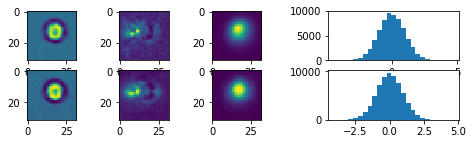

54100 1.384087 0.6547058 4.850681
54200 1.3994808 0.6920212 4.7500525
54300 1.4680488 0.6379312 5.0304446
54400 1.461137 0.70973825 4.873533
54500 1.4945445 0.706064 5.1068583
54600 1.44852 0.6222519 4.782807
54700 1.4932221 0.64902824 5.195951
54800 1.4495583 0.68879324 4.78322
54900 1.4275255 0.6470651 4.873169
55000 1.4340386 0.665012 5.254382
display


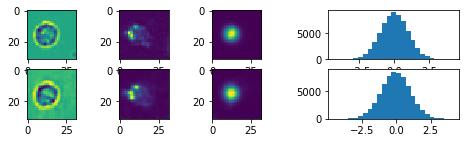

55100 1.4655805 0.6536219 4.9510145
55200 1.487176 0.6239077 4.9959536
55300 1.437774 0.68363595 4.5374146
55400 1.4519777 0.68456626 4.918379
55500 1.4333538 0.6912477 4.7317553
55600 1.4498672 0.6642388 4.930433
55700 1.3922439 0.6350372 5.0304613
55800 1.3798527 0.66330945 4.6423388
55900 1.4407609 0.6524896 5.1108932
56000 1.4709244 0.65858024 4.7917175
display


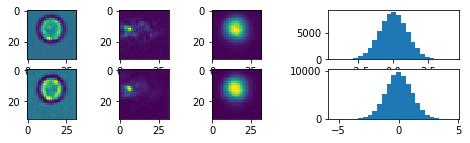

56100 1.4160612 0.73412234 4.9636064
56200 1.4373939 0.6593163 5.012781
56300 1.4195317 0.64391965 5.1655793
56400 1.4787039 0.6586875 5.0502777
56500 1.4971699 0.6824129 5.013088
56600 1.4463744 0.6266849 5.0028696
56700 1.4328461 0.6724758 4.8514247
56800 1.4861524 0.72139937 4.704686
56900 1.4463844 0.68319446 5.1250043
57000 1.4679134 0.6550507 5.250226
display


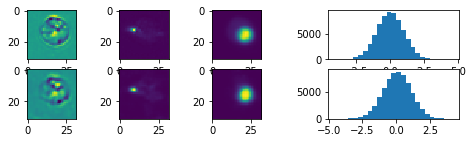

57100 1.4355984 0.6938363 5.0775566
57200 1.4448769 0.6682361 5.1125307
57300 1.4403348 0.6397948 4.9599733
57400 1.4901233 0.6537844 5.313214
57500 1.4314015 0.6481771 4.860573
57600 1.4283772 0.67260957 5.011432
57700 1.4579062 0.6609903 5.0923386
57800 1.4110951 0.6370677 4.919178
57900 1.4490157 0.65422505 5.206409
58000 1.4915854 0.66736674 5.175145
display


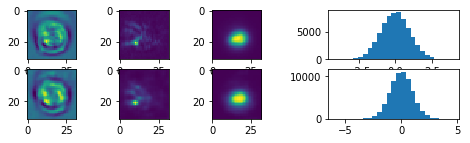

58100 1.4823542 0.6958492 5.1120243
58200 1.6259596 0.5945646 5.1604643
58300 1.4566665 0.64426607 5.4394326
58400 1.52485 0.7000671 4.9971733
58500 1.4216499 0.6594629 5.129096
58600 1.4368637 0.6428507 4.9717636
58700 1.4595642 0.7166576 5.2368555
58800 1.4492583 0.6748502 4.810286
58900 1.469084 0.68797135 4.94474
59000 1.4736133 0.6850557 4.5513926
display


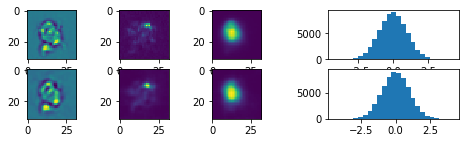

59100 1.4564552 0.66646105 4.710809
59200 1.4214866 0.6608604 5.520929
59300 1.46366 0.64470696 4.8697805
59400 1.4211915 0.62008786 4.862627
59500 1.3981695 0.64022154 4.750988
59600 1.3778365 0.655583 4.816947
59700 1.447545 0.70850307 4.712367
59800 1.4801242 0.6736569 4.9941044
59900 1.4168541 0.6895684 4.6048837
60000 1.4523051 0.66396475 4.8243175
display


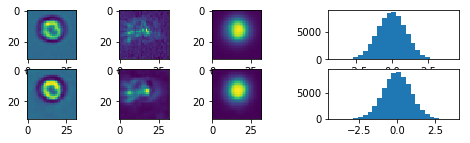

60100 1.466588 0.68525106 4.7146597
60200 1.4581373 0.6971295 4.4680705
60300 1.438734 0.6925096 4.7007103
60400 1.4313967 0.6102681 4.6851187
60500 1.4697194 0.66398656 4.8622026
60600 1.429327 0.6293204 4.7747045
60700 1.4650928 0.6244198 4.9023733
60800 1.4122126 0.66195494 5.099658
60900 1.4560709 0.63136804 5.2833967
61000 1.4685189 0.651844 5.1272597
display


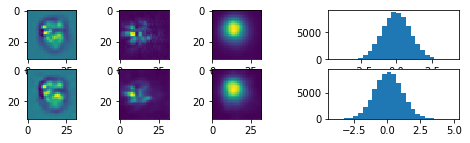

61100 1.4203548 0.6943519 4.999349
61200 1.5445726 0.63730526 5.093982
61300 1.4515393 0.6986364 5.209481
61400 1.5009834 0.67625487 4.8441777
61500 1.4468353 0.63578796 5.0630646
61600 1.4472736 0.60246825 5.371649
61700 1.5050137 0.6156975 5.4085417
61800 1.4898386 0.74628013 4.8616533
61900 1.45219 0.666896 5.0991526
62000 1.4301307 0.6238296 4.9154024
display


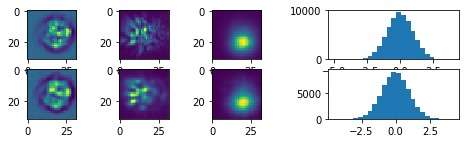

62100 1.4420598 0.6787869 5.024701
62200 1.423577 0.6714813 4.8468046
62300 1.4151589 0.7066589 4.578402
62400 1.3673033 0.7580264 4.923665
62500 1.5791229 0.63700664 6.0603
62600 1.4935594 0.65738636 5.0544567
62700 1.50246 0.70777917 5.062168
62800 1.430525 0.6423658 5.060857
62900 1.4989431 0.666183 4.799557
63000 1.4509473 0.66997933 4.8348956
display


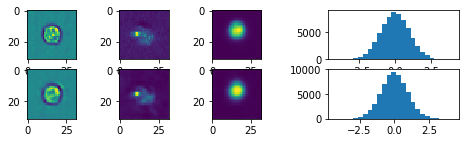

63100 1.4318192 0.6469587 4.7650757
63200 1.4464401 0.6926797 4.7227845
63300 1.4216127 0.6663623 4.6155953
63400 1.4462314 0.67999697 4.780731
63500 1.4550546 0.6684519 4.9352074
63600 1.4303244 0.6960395 4.923752
63700 1.4559832 0.69499755 5.1795154
63800 1.4006488 0.64232635 4.955269
63900 1.4640715 0.708916 4.9566684
64000 1.4411435 0.69595027 4.9944983
display


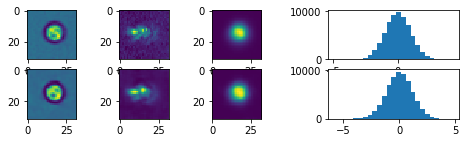

64100 1.4314561 0.67756903 5.3524585
64200 1.467946 0.65971786 4.890118
64300 1.4174232 0.6552502 5.2451763
64400 1.444165 0.63360083 5.448606
64500 1.4624133 0.67908484 5.0026865
64600 1.403127 0.6661523 5.171779
64700 1.4414377 0.65960264 5.6333456
64800 1.4509611 0.5866942 5.67041
64900 1.4721959 0.58271664 5.7509003
65000 1.5343194 0.6184811 5.80053
display


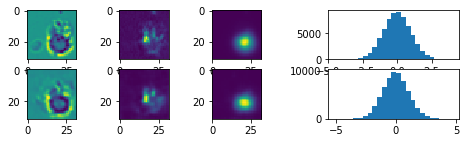

65100 1.7636601 0.59181064 6.154422
65200 1.4607556 0.6911627 5.1425514
65300 1.3973715 0.7136602 4.487602
65400 1.3975835 0.6550223 4.5954957
65500 1.4104866 0.6955006 4.66064
65600 1.44694 0.7033169 4.510212
65700 1.4440327 0.6952187 4.61569
65800 1.3931956 0.69605005 4.949847
65900 1.4070683 0.67831147 4.501898
66000 1.433691 0.7047156 4.4001055
display


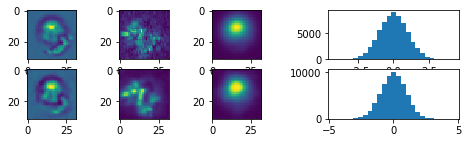

66100 1.4162877 0.6687176 4.5881267
66200 1.3747799 0.70992404 4.6401563
66300 1.4280374 0.65945697 4.3594604
66400 1.4296625 0.67051244 4.5104027
66500 1.4603806 0.68637216 5.0461884
66600 1.4130085 0.66269016 4.788743
66700 1.3981918 0.6800817 4.5176067
66800 1.4409335 0.6552035 4.522964
66900 1.3833239 0.72119904 4.6519794
67000 1.4846487 0.6804709 4.642687
display


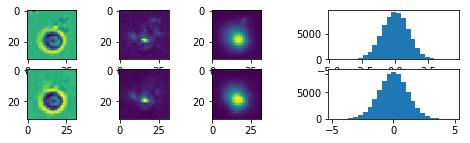

67100 1.4070041 0.67019475 4.909418
67200 1.4061477 0.6653179 5.5407653
67300 1.4508176 0.6496152 5.2979217
67400 1.4032679 0.7108017 5.0899353
67500 1.4704194 0.7139188 5.647635
67600 1.4023378 0.6516412 4.627848
67700 1.4207203 0.70527256 5.134745
67800 1.557706 0.6099182 5.345108
67900 1.5104094 0.74883133 5.2910943
68000 1.4368286 0.63868415 5.2658277
display


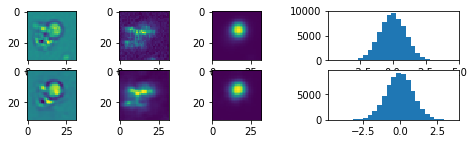

68100 1.4201183 0.6876583 5.563198
68200 1.4064076 0.68315697 5.376424
68300 1.4663554 0.67862785 5.708928
68400 1.4603946 0.5957977 4.974456
68500 1.4366915 0.7040238 5.2626495
68600 1.483251 0.6700459 5.166619
68700 1.40531 0.66760534 5.0405607
68800 1.3687687 0.7008074 5.1949677
68900 1.4853656 0.6623543 5.242141
69000 1.4220388 0.6738844 4.674597
display


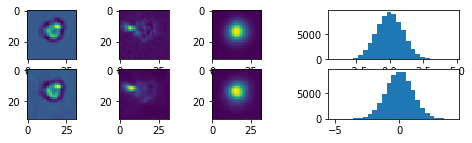

69100 1.4151602 0.6679325 5.0094924
69200 1.4069147 0.71131915 4.722897
69300 1.423686 0.64768386 4.805333
69400 1.3912587 0.6778306 4.4289384
69500 1.4398408 0.70194584 4.893
69600 1.4434712 0.65116775 4.652277
69700 1.4051132 0.67790616 4.7992344
69800 1.4507239 0.71287215 4.996653
69900 1.4614806 0.67163414 4.8645887
70000 1.4488237 0.65598917 5.4519825
display


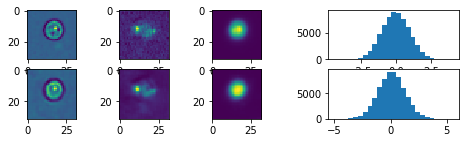

70100 1.4741399 0.67481256 5.460088
70200 1.4320827 0.66054726 5.0512958
70300 1.4496751 0.69580865 4.8229675
70400 1.4439416 0.6739926 5.168361
70500 1.4143398 0.62753 4.901781
70600 1.4629997 0.7044522 4.947232
70700 1.4422929 0.6945211 4.6640425
70800 1.4416403 0.63816816 5.5080338
70900 1.5143225 0.6663134 4.8946524
71000 1.481211 0.69207 5.1587834
display


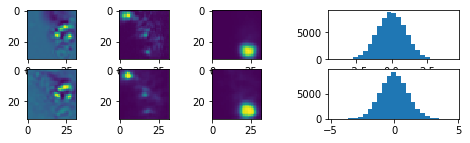

71100 1.430743 0.69747126 5.1546144
71200 1.4645467 0.70343435 4.933221
71300 1.422193 0.6529928 5.292221
71400 1.4261267 0.7007687 4.8266788
71500 1.4190196 0.6643772 5.853709
71600 1.4259796 0.6479771 5.107766
71700 1.4885601 0.76799 5.0443964
71800 1.4787481 0.57347965 5.016256
71900 1.4429101 0.6186198 5.492277
72000 1.4925315 0.6949537 5.1887126
display


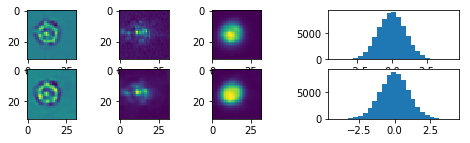

72100 1.4118729 0.6519538 4.996223
72200 1.4080776 0.6540061 4.8553257
72300 1.4745524 0.6618681 5.0526667
72400 1.4104829 0.6733641 4.9033165
72500 1.4197466 0.6806863 4.5450153
72600 1.4347849 0.68859136 4.536766
72700 1.4277844 0.6298615 4.899289
72800 1.3959813 0.73312765 4.34175
72900 1.3950387 0.6820951 5.1325636
73000 1.4230101 0.67679894 4.3427877
display


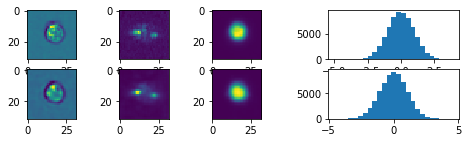

73100 1.4031739 0.70122474 4.576419
73200 1.4577823 0.68610173 4.7765074
73300 1.46606 0.69294924 4.8128147
73400 1.4403532 0.6783526 5.265555
73500 1.4511266 0.6711627 4.720181
73600 1.4790251 0.62415266 5.4037323
73700 1.4345632 0.6601125 5.153257
73800 1.4177029 0.6561635 4.595628
73900 1.4661304 0.68088174 6.219131
74000 1.4949634 0.640522 4.904949
display


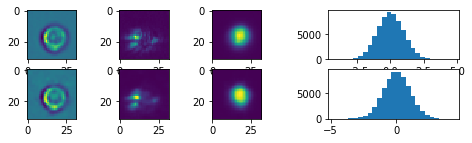

74100 1.4599345 0.6817019 4.708588
74200 1.4073517 0.69834733 5.3217535
74300 1.4263833 0.63328826 5.01974
74400 1.4377451 0.65969765 5.268678
74500 1.4085428 0.6421254 5.128617
74600 1.4104433 0.68748796 4.948577
74700 1.4753814 0.6580846 4.6824064
74800 1.4336039 0.66891795 5.403236
74900 1.5942645 0.6576402 6.911528
75000 1.6765754 0.59236515 5.8285317
display


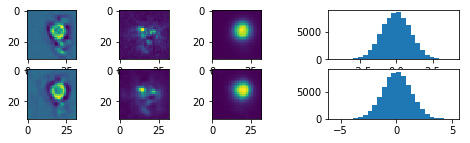

75100 1.4628677 0.6651711 5.6024847
75200 1.5096779 0.6474927 5.2107058
75300 1.4456171 0.65945375 5.3152423
75400 1.4899863 0.68354625 5.5926275
75500 1.4427271 0.6250464 5.0579205
75600 1.4957106 0.666249 4.82655
75700 1.4322745 0.6561909 5.203476
75800 1.4679236 0.6959719 5.276538
75900 1.4597666 0.64883876 4.8978033
76000 1.4332814 0.6417854 5.311717
display


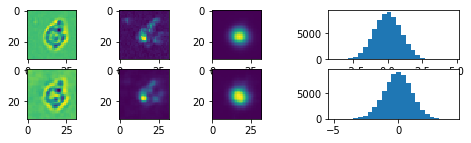

76100 1.4374547 0.69538826 5.486413
76200 1.4153655 0.6860386 5.055571
76300 1.4780359 0.66817105 5.0684147
76400 1.4322162 0.6662539 5.176485
76500 1.4537097 0.6917395 4.849311
76600 1.4093854 0.6796153 4.888069
76700 1.4430459 0.6651692 4.8974824
76800 1.428303 0.68195266 5.3584785
76900 1.4334745 0.66165894 5.0577154
77000 1.4449825 0.648996 4.9565306
display


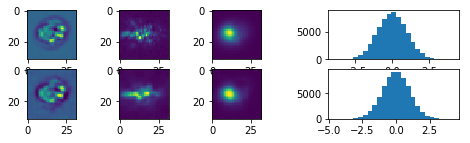

77100 1.4332776 0.6529904 4.988235
77200 1.5029049 0.68233675 4.8428583
77300 1.4822303 0.63231397 5.1540985
77400 1.4524813 0.6807657 5.11621
77500 1.4522083 0.6857352 4.9085693
77600 1.5122482 0.68691146 5.3853655
77700 1.4698663 0.67725676 5.3785543
77800 1.4759741 0.6503132 5.4571524
77900 1.4270113 0.61343527 5.524398
78000 1.4955169 0.65025014 5.019185
display


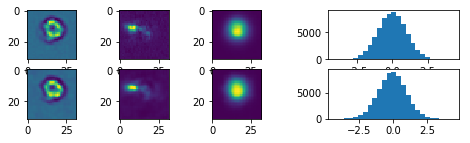

78100 1.5100458 0.6111459 4.9740343
78200 1.4424373 0.6920467 5.376844
78300 1.4894164 0.6487676 5.2186337
78400 1.5090024 0.621028 5.6264935
78500 1.4191519 0.6880718 5.3602552
78600 1.4088098 0.69184333 5.080726
78700 1.4421036 0.66070056 5.2066293
78800 1.4305779 0.6891996 6.1923027
78900 1.5054584 0.64221805 5.569464
79000 1.4436501 0.6403978 5.743497
display


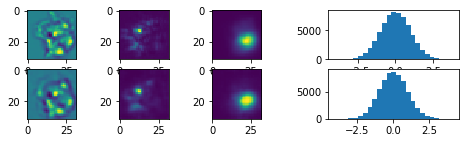

79100 1.5211468 0.64724326 6.17492
79200 1.4342555 0.6372988 5.0527434
79300 1.4023058 0.6915552 4.9122176
79400 1.4860446 0.673364 5.0978217
79500 1.4832728 0.67396915 5.0060396
79600 1.4511521 0.65106994 5.002585
79700 1.447382 0.6883758 5.256947
79800 1.4658904 0.67572093 5.0888963
79900 1.4807594 0.6801724 5.1191134
80000 1.4287093 0.64328086 5.1541705
display


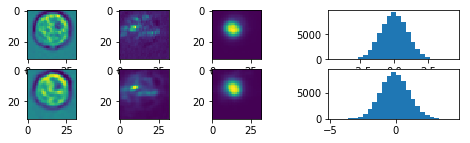

Done


In [10]:
datadir = "/media/cjw/Data/cyto/Snail_rop/"
t = aae.training(setup(), datadir, "snail_rop")
t.train(gpu=True, display=True, display_int=1000, report_int=100, niterations=80001)


In [ ]:
x = 4
x